# Analysis Notebook                                    -Prakhar Srivastava

# Schemas:

## Mobile Network Events: 

In [4]:
import pandas as pd
import geopandas as gpd
import psycopg2
from sqlalchemy import create_engine
from shapely import wkb

import matplotlib.pyplot as plt
import seaborn as sns

from dotenv import load_dotenv
import os

load_dotenv()

# Load DB credentials
pg_user = os.getenv("POSTGRES_USER")
pg_pass = os.getenv("POSTGRES_PASSWORD")
pg_db   = os.getenv("POSTGRES_DB")
pg_host = os.getenv("POSTGRES_HOST", "postgres")
pg_port = os.getenv("POSTGRES_PORT", "5432")

engine = create_engine(f"postgresql://{pg_user}:{pg_pass}@{pg_host}:{pg_port}/{pg_db}")
df = pd.read_sql("SELECT * FROM mobile_events_compressed", engine)
df

,user_id,cell_id,timestamp,date
0,0001528a3705455624f234a9066cca979b7516cdc417f5...,214464731461183,2024-10-01 08:13:22,2024-10-01
1,0001528a3705455624f234a9066cca979b7516cdc417f5...,214464731461183,2024-10-01 08:13:22,2024-10-01
2,0001528a3705455624f234a9066cca979b7516cdc417f5...,44917337858977,2024-10-01 08:01:41,2024-10-01
3,0001528a3705455624f234a9066cca979b7516cdc417f5...,44917337858977,2024-10-01 08:01:41,2024-10-01
4,0001528a3705455624f234a9066cca979b7516cdc417f5...,699823337676463,2024-10-01 13:25:53,2024-10-01
...,...,...,...,...
9224399,fffe405de842df7e82d3a610b0917dfd79fc2fd526cfbe...,54373241564166,2024-10-01 15:58:43,2024-10-01
9224400,ffff925a44dfc908915841bdafe81d3ee3b5238610e490...,656966150508305,2024-10-01 01:05:59,2024-10-01
9224401,ffff925a44dfc908915841bdafe81d3ee3b5238610e490...,656966150508305,2024-10-01 01:58:21,2024-10-01
9224402,fffff7f18e3f2477c5c981222df6260c01b0e9324cfc87...,487521395389385,2024-10-01 14:02:10,2024-10-01


## Mobile Network Cell Plan: 

In [5]:
import pandas as pd
import geopandas as gpd
import psycopg2
from sqlalchemy import create_engine
from shapely import wkb

import matplotlib.pyplot as plt
import seaborn as sns

from dotenv import load_dotenv
import os

load_dotenv()

# Load DB credentials
pg_user = os.getenv("POSTGRES_USER")
pg_pass = os.getenv("POSTGRES_PASSWORD")
pg_db   = os.getenv("POSTGRES_DB")
pg_host = os.getenv("POSTGRES_HOST", "postgres")
pg_port = os.getenv("POSTGRES_PORT", "5432")

engine = create_engine(f"postgresql://{pg_user}:{pg_pass}@{pg_host}:{pg_port}/{pg_db}")
df = pd.read_sql("SELECT * FROM cell_plan", engine)
df

,cell_id,latitude,longitude,date
0,56357337774390,59.064053,24.722544,2024-10-01
1,409154182915144,58.801560,25.556684,2024-10-01
2,40755112467589,59.437344,24.088902,2024-10-01
3,801519126080164,59.452003,24.123796,2024-10-01
4,239726942317455,59.525280,25.305754,2024-10-01
...,...,...,...,...
2995,964113705777038,59.121223,24.698582,2024-10-01
2996,745607323874882,59.314950,24.618970,2024-10-01
2997,937792335406354,58.918343,24.202808,2024-10-01
2998,741889809026647,59.336690,25.280945,2024-10-01


## Local Administrative Units: 

In [8]:
import pandas as pd
import geopandas as gpd
from sqlalchemy import create_engine
from shapely import wkb
from shapely.geometry import MultiPolygon, Polygon
import matplotlib.pyplot as plt
import seaborn as sns

from dotenv import load_dotenv
import os

load_dotenv()

# Load DB credentials
pg_user = os.getenv("POSTGRES_USER")
pg_pass = os.getenv("POSTGRES_PASSWORD")
pg_db   = os.getenv("POSTGRES_DB")
pg_host = os.getenv("POSTGRES_HOST", "postgres")
pg_port = os.getenv("POSTGRES_PORT", "5432")

engine = create_engine(f"postgresql://{pg_user}:{pg_pass}@{pg_host}:{pg_port}/{pg_db}")
df = pd.read_sql("SELECT * FROM lau", engine)
df["geometry"] = df["geometry"].apply(wkb.loads)
# Ensure all geometries are MultiPolygon
def to_multipolygon(geom):
    if isinstance(geom, Polygon):
        return MultiPolygon([geom])
    return geom

df["geometry"] = df["geometry"].apply(to_multipolygon)
gdf = gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:3035")
gdf

,lau_id,country_code,lau_name,geometry
0,EE_0130,EE,Alutaguse vald,"MULTIPOLYGON (((5332145.818 4142941.007, 53321..."
1,EE_0141,EE,Anija vald,"MULTIPOLYGON (((5200760.357 4114718.188, 51982..."
2,EE_0142,EE,Antsla vald,"MULTIPOLYGON (((5295315.833 3954970.382, 52962..."
3,EE_0171,EE,Elva vald,"MULTIPOLYGON (((5276266.951 4034543.45, 527657..."
4,EE_0184,EE,Haapsalu linn,"MULTIPOLYGON (((5102500.812 4059773.145, 51025..."
...,...,...,...,...
74,EE_0907,EE,Vormsi vald,"MULTIPOLYGON (((5086823.054 4060052.244, 50866..."
75,EE_0917,EE,Võru vald,"MULTIPOLYGON (((5347415.348 3966742.14, 534703..."
76,EE_0919,EE,Võru linn,"MULTIPOLYGON (((5318405.249 3980686.628, 53189..."
77,EE_0928,EE,Väike-Maarja vald,"MULTIPOLYGON (((5268940.253 4094186.443, 52664..."


In [2]:
pd.read_sql("SELECT COUNT(*) FROM mobile_events_compressed", engine)


,count
0,9224404


## Number of Events per Hour (View: events_per_hour_2024_10_01)

In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from dotenv import load_dotenv

load_dotenv()

pg_user = os.getenv("POSTGRES_USER", "postgres")
pg_pass = os.getenv("POSTGRES_PASSWORD", "postgres")
pg_db   = os.getenv("POSTGRES_DB", "mobility")
pg_host = os.getenv("POSTGRES_HOST", "localhost")
pg_port = os.getenv("POSTGRES_PORT", "5432")

engine = create_engine(f"postgresql+psycopg2://{pg_user}:{pg_pass}@{pg_host}:{pg_port}/{pg_db}")
df = pd.read_sql("SELECT * FROM events_per_hour_2024_10_01", engine)
df

,hour,event_count
0,2024-10-01 00:00:00,1787438
1,2024-10-01 01:00:00,1789617
2,2024-10-01 02:00:00,1787638
3,2024-10-01 03:00:00,1786754
4,2024-10-01 04:00:00,1787870
5,2024-10-01 05:00:00,1725089
6,2024-10-01 06:00:00,1656876
7,2024-10-01 07:00:00,1654321
8,2024-10-01 08:00:00,1646173
9,2024-10-01 09:00:00,1636973


## Number of Unique Users per Hour (View: agg_unique_users_per_hour)

In [4]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from dotenv import load_dotenv

load_dotenv()

pg_user = os.getenv("POSTGRES_USER", "postgres")
pg_pass = os.getenv("POSTGRES_PASSWORD", "postgres")
pg_db   = os.getenv("POSTGRES_DB", "mobility")
pg_host = os.getenv("POSTGRES_HOST", "localhost")
pg_port = os.getenv("POSTGRES_PORT", "5432")

engine = create_engine(f"postgresql+psycopg2://{pg_user}:{pg_pass}@{pg_host}:{pg_port}/{pg_db}")
df = pd.read_sql("SELECT * FROM agg_unique_users_per_hour", engine)
df

,hour,unique_user_count
0,2024-10-01 00:00:00,150000
1,2024-10-01 01:00:00,149999
2,2024-10-01 02:00:00,150000
3,2024-10-01 03:00:00,150000
4,2024-10-01 04:00:00,150000
5,2024-10-01 05:00:00,149998
6,2024-10-01 06:00:00,149996
7,2024-10-01 07:00:00,149994
8,2024-10-01 08:00:00,150000
9,2024-10-01 09:00:00,149997


## Number of Unique Locations(cell_ids) per User per Day (View: unique_locations_per_user_per_day)

In [5]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from dotenv import load_dotenv

load_dotenv()
s
pg_user = os.getenv("POSTGRES_USER", "postgres")
pg_pass = os.getenv("POSTGRES_PASSWORD", "postgres")
pg_db   = os.getenv("POSTGRES_DB", "mobility")
pg_host = os.getenv("POSTGRES_HOST", "localhost")
pg_port = os.getenv("POSTGRES_PORT", "5432")

engine = create_engine(f"postgresql+psycopg2://{pg_user}:{pg_pass}@{pg_host}:{pg_port}/{pg_db}")
df = pd.read_sql("SELECT * FROM unique_locations_per_user_per_day", engine)
df

,user_id,date,unique_locations
0,0000a456e7b5a5eb059e721fb431436883143101275c40...,2024-10-01,8
1,0001528a3705455624f234a9066cca979b7516cdc417f5...,2024-10-01,8
2,0001702d0abcdbeeb23f7c434aa6858030f365caf1464a...,2024-10-01,8
3,0001ae52a920c36edc7ab364ea58a58ca725f0ad44c02b...,2024-10-01,15
4,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,2024-10-01,9
...,...,...,...
149995,fffeb5d21b5a1160a3fe9a4de54851b3f2f96e3d6c7e7c...,2024-10-01,11
149996,ffff8ed56f65caf0019f90d65b7f158b862efcab5c4517...,2024-10-01,6
149997,ffff925a44dfc908915841bdafe81d3ee3b5238610e490...,2024-10-01,14
149998,ffffc7a636e58b3c81ca8d4c7869ab1b109c84d29d8f33...,2024-10-01,13


## Number of Unique Users per LAU per Day (View: unique_users_per_lau_per_day)

In [6]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from dotenv import load_dotenv

load_dotenv()

pg_user = os.getenv("POSTGRES_USER", "postgres")
pg_pass = os.getenv("POSTGRES_PASSWORD", "postgres")
pg_db   = os.getenv("POSTGRES_DB", "mobility")
pg_host = os.getenv("POSTGRES_HOST", "localhost")
pg_port = os.getenv("POSTGRES_PORT", "5432")

engine = create_engine(f"postgresql+psycopg2://{pg_user}:{pg_pass}@{pg_host}:{pg_port}/{pg_db}")
df = pd.read_sql("SELECT * FROM unique_users_per_lau_per_day", engine)
df

,lau_id,lau_name,date,user_count
0,EE_0141,Anija vald,2024-10-01,14438
1,EE_0191,Haljala vald,2024-10-01,2039
2,EE_0198,Harku vald,2024-10-01,6077
3,EE_0245,Jõelähtme vald,2024-10-01,6675
4,EE_0255,Järva vald,2024-10-01,23466
5,EE_0272,Kadrina vald,2024-10-01,4108
6,EE_0293,Kehtna vald,2024-10-01,11989
7,EE_0296,Keila linn,2024-10-01,1381
8,EE_0305,Kiili vald,2024-10-01,4187
9,EE_0317,Kohila vald,2024-10-01,6714


## Bonus Task: Daytime vs Nighttime Population by Local Administrative Unit on 2024-10-01

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

pg_user = os.getenv("POSTGRES_USER")
pg_pass = os.getenv("POSTGRES_PASSWORD")
pg_db   = os.getenv("POSTGRES_DB")
pg_host = os.getenv("POSTGRES_HOST", "localhost")
pg_port = os.getenv("POSTGRES_PORT", "5432")

engine = create_engine(f"postgresql+psycopg2://{pg_user}:{pg_pass}@{pg_host}:{pg_port}/{pg_db}")
df = pd.read_sql("SELECT * FROM view_users_per_lau_day_night", engine)
df

,lau_id,lau_name,day_users,night_users
0,EE_0141,Anija vald,14401,8665
1,EE_0191,Haljala vald,2039,1274
2,EE_0198,Harku vald,6031,2895
3,EE_0245,Jõelähtme vald,6645,3646
4,EE_0255,Järva vald,23411,16509
...,...,...,...,...
74,EE_0714,Saaremaa vald,0,0
75,EE_0586,Peipsiääre vald,0,0
76,EE_0919,Võru linn,0,0
77,EE_0917,Võru vald,0,0


# Visualisations:

## Number of Events per Hour

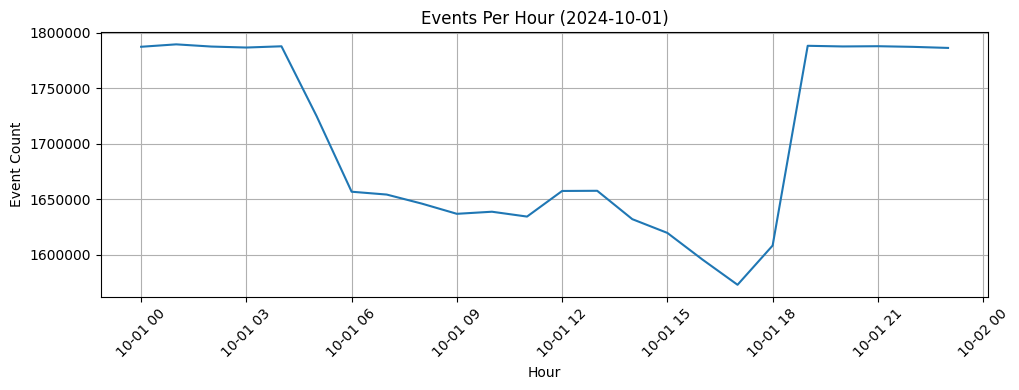

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv

# Load credentials
load_dotenv()
pg_user = os.getenv("POSTGRES_USER")
pg_pass = os.getenv("POSTGRES_PASSWORD")
pg_db   = os.getenv("POSTGRES_DB")
pg_host = os.getenv("POSTGRES_HOST")
pg_port = os.getenv("POSTGRES_PORT", "5432")

engine = create_engine(f"postgresql+psycopg2://{pg_user}:{pg_pass}@{pg_host}:{pg_port}/{pg_db}")

# Load view
df = pd.read_sql("SELECT * FROM events_per_hour_2024_10_01", engine)
df["hour"] = pd.to_datetime(df["hour"])
df.sort_values("hour", inplace=True)

# Plot
plt.figure(figsize=(10, 4))
sns.lineplot(data=df, x="hour", y="event_count")
plt.title("Events Per Hour (2024-10-01)")
plt.xlabel("Hour")
plt.ylabel("Event Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.show()


## Number of Unique locations per user

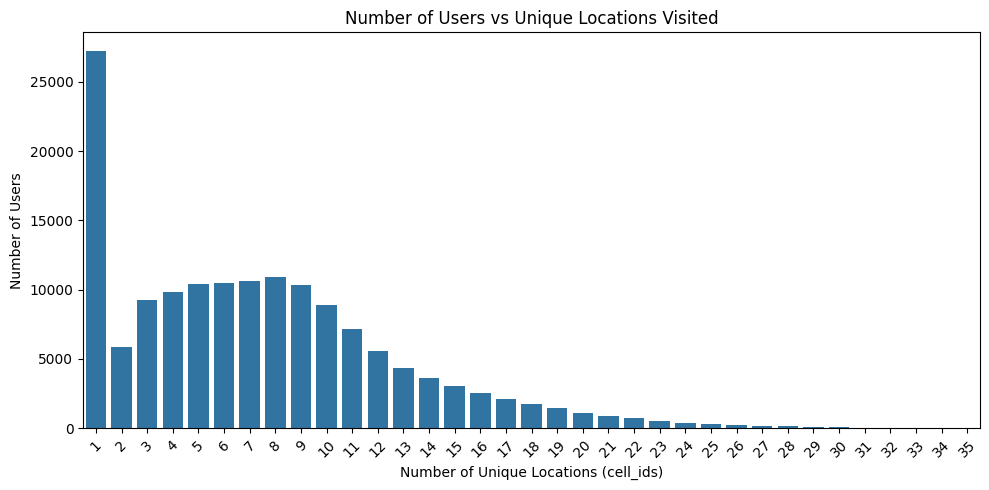

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

# Setup database connection
pg_user = os.getenv("POSTGRES_USER", "postgres")
pg_pass = os.getenv("POSTGRES_PASSWORD", "postgres")
pg_db   = os.getenv("POSTGRES_DB", "mobility")
pg_host = os.getenv("POSTGRES_HOST", "localhost")
pg_port = os.getenv("POSTGRES_PORT", "5432")

engine = create_engine(f"postgresql+psycopg2://{pg_user}:{pg_pass}@{pg_host}:{pg_port}/{pg_db}")

# Query the aggregated view
df = pd.read_sql("SELECT * FROM user_location_distribution", con=engine)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="unique_locations", y="user_count")
plt.title("Number of Users vs Unique Locations Visited")
plt.xlabel("Number of Unique Locations (cell_ids)")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Daytime Population

<Figure size 1000x800 with 0 Axes>

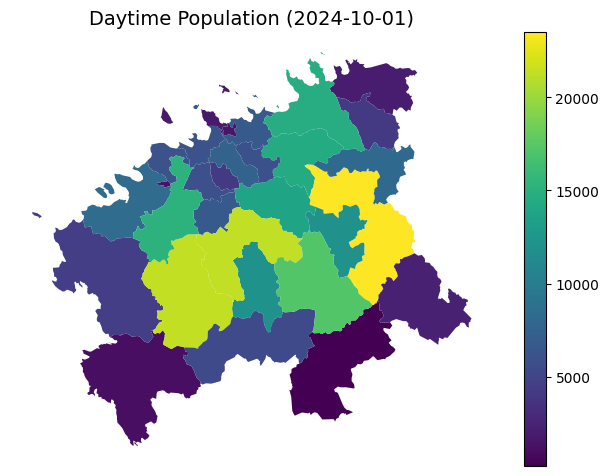

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv

load_dotenv()
pg_user = os.getenv("POSTGRES_USER")
pg_pass = os.getenv("POSTGRES_PASSWORD")
pg_db   = os.getenv("POSTGRES_DB")
pg_host = os.getenv("POSTGRES_HOST")
pg_port = os.getenv("POSTGRES_PORT", "5432")

engine = create_engine(f"postgresql+psycopg2://{pg_user}:{pg_pass}@{pg_host}:{pg_port}/{pg_db}")

# Load view data
df = pd.read_sql("SELECT * FROM unique_users_per_lau_2024_10_01", engine)

# Load geometry separately (already matched LAUs)
gdf = gpd.read_postgis("SELECT * FROM lau", engine, geom_col="geometry")

# Join for plotting
gdf_plot = gdf.merge(df, on="lau_id", how="left")
gdf_plot["user_count"] = gdf_plot["user_count"].fillna(0)

# Plot
plt.figure(figsize=(10, 8))
gdf_plot[gdf_plot["user_count"] > 0].plot(column="user_count", cmap="viridis", legend=True)
plt.title("Daytime Population (2024-10-01)", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()
